  Business Unit    Total Due      Total PV
0        Unit 1  20481068.84  1.853253e+07
1        Unit 2  17557430.54  1.539023e+07
2        Unit 3  12897233.57  1.089416e+07
3        Unit 4  15253318.08  1.329945e+07
4        Unit 5  19664482.37  1.780111e+07
5        Unit 6  15416045.38  1.334121e+07
6        Unit 7  12456360.43  1.132127e+07


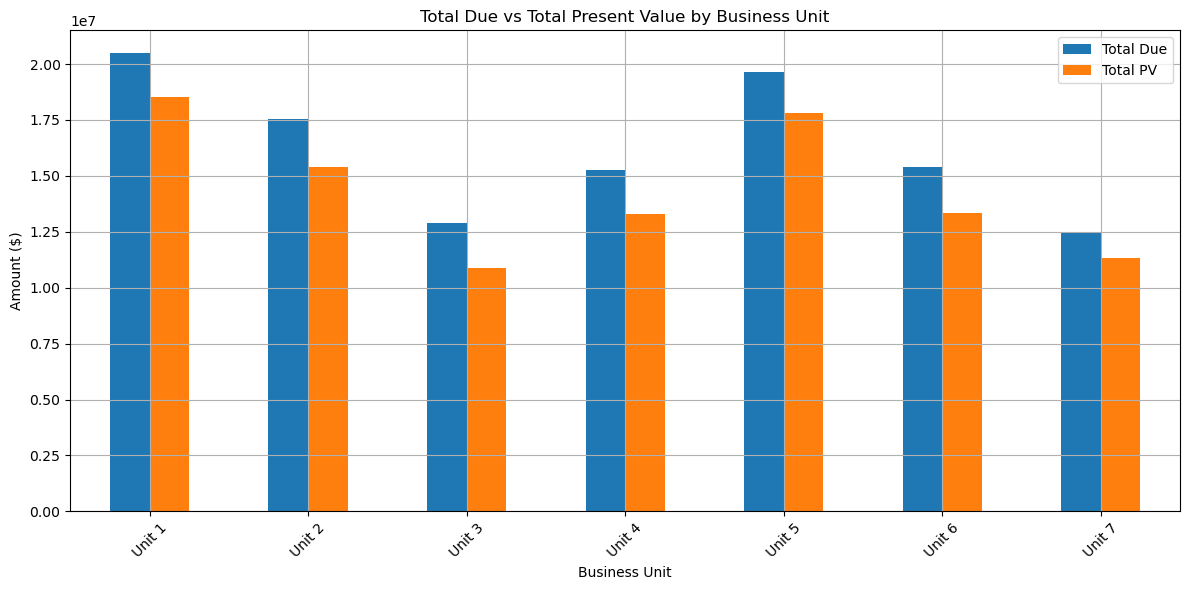

In [1]:
# --- Imports (necessary to run the code) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Generate Synthetic Data ---
n_units = 7  # changed from 5 to 7 units
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(123)  # changed seed for different random numbers

aging_buckets = {
    'Current': (75000, 6000000),
    '1-30 Days': (15000, 12000000),
    '31-60 Days': (12000, 4500000),
    '61-90 Days': (8000, 5500000),
    '91-120 Days': (40000, 2500000),
    '121-365': (8000, 1800000),
    'Over 365 Days': (2000, 800000),
    'Unapplied Payments': (-15000, -7000),
    '# of Invoices': (150, 20000)
}

data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']

# --- Present Value Calculation ---
discount_rate = 0.06  # 6% discount rate
aging_to_months = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

for bucket, months in aging_to_months.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** months)

df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_to_months]].sum(axis=1)

# --- Display Summary ---
print(df[['Business Unit', 'Total Due', 'Total PV']])

# --- Plot the Data ---
df.plot(x='Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
